In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import warnings
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
import joblib


In [2]:
# Load the train dataset 
data = pd.read_csv('bank-additional-full.csv', sep=';')  

## Data Exploration

In [3]:
# View columns in groups of 10.
data[list(data.columns)[:10]].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon
1,57,services,married,high.school,unknown,no,no,telephone,may,mon
2,37,services,married,high.school,no,yes,no,telephone,may,mon
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,56,services,married,high.school,no,no,yes,telephone,may,mon


In [4]:
# View columns in groups of 10.
data[list(data.columns)[10:]].head()

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
print(data.info())
print(data.describe())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
# Lets see whats in each column
# for each column
for a in list(data.columns):
    
    # get a list of unique values
    n = data[a].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(a)
        print(n)
    else:
        print(a + ': ' +str(len(n)) + ' unique values')

age: 78 unique values
job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
duration: 1544 unique values
campaign: 42 unique values
pdays
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]
previous
[0 1 2 3 4 5 6 7]
poutcome
['nonexistent' 'failure' 'success']
emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
cons.price.idx
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Key Insights:

1. The dataset features a balanced mix of categorical and numerical columns.

2. Numerical Variables: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, and nr.employed.

3. All columns contain non-null values, ensuring complete data for analysis.

4. Target Variable (y): Contains two categories: "yes" and "no."

5. Categorical Variables: default, housing, and loan each have three categories: "yes," "no," and "unknown."

6. Exclusion of 'duration': This variable strongly influences the target (e.g., if duration=0, y='no'). However, since 'duration' is only known after the call, including it would compromise the model's predictive realism. Therefore, it will be excluded except for benchmarking purposes.

## Feature Engineering 
Feature engineering involves organizing features into numerical and categorical groups for detailed analysis and improved machine learning performance. In this section, we will create and refine features for our predictive model. We'll add new variables to the DataFrame while tracking the columns to include in the model. The process will be divided into two parts: numerical and categorical features.

### Numerical features

In [8]:
cols_num = ['campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'nr.employed','age','euribor3m']

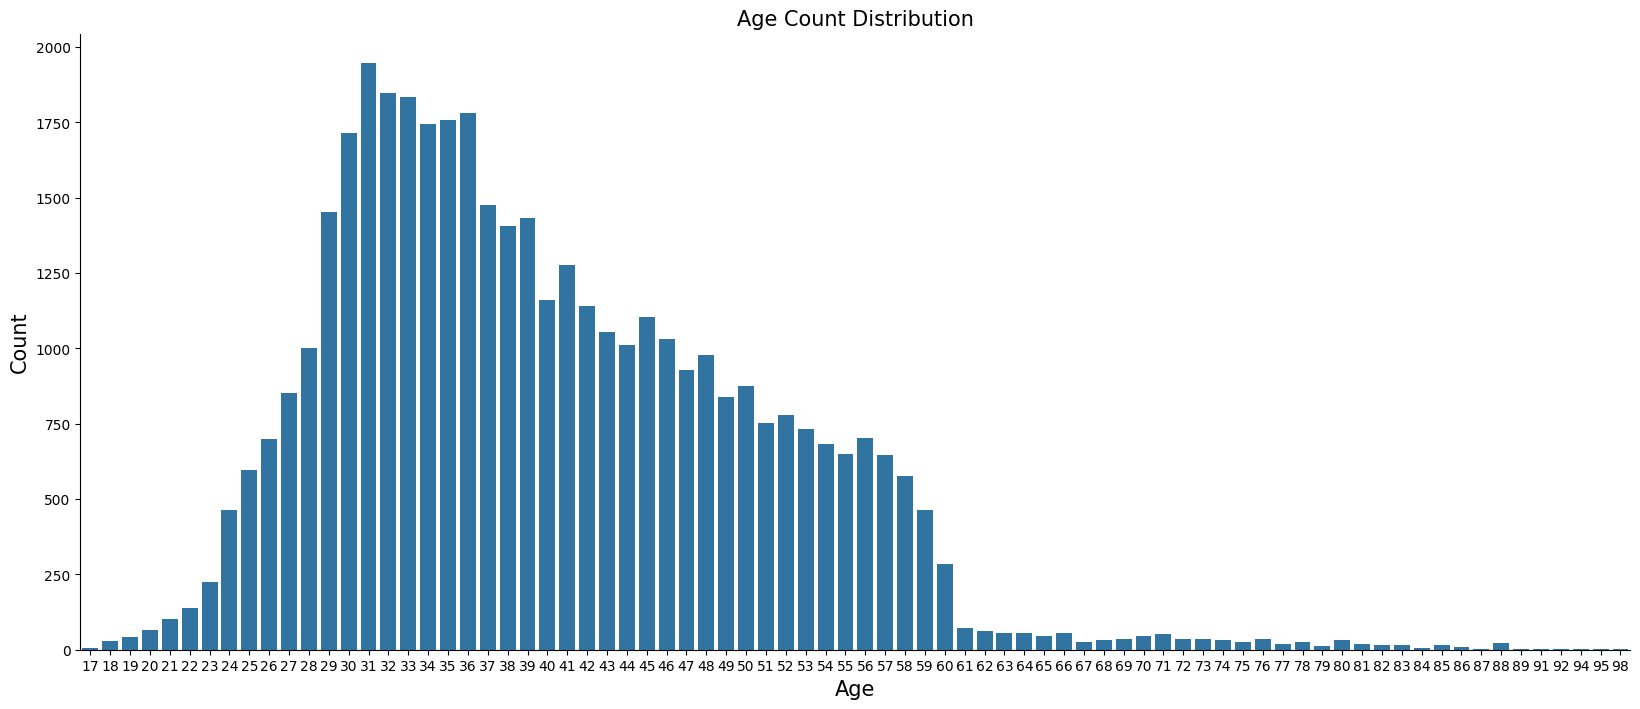

In [9]:
## Graphical representation of the numeraical features

warnings.filterwarnings('ignore')
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data =  data[cols_num])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

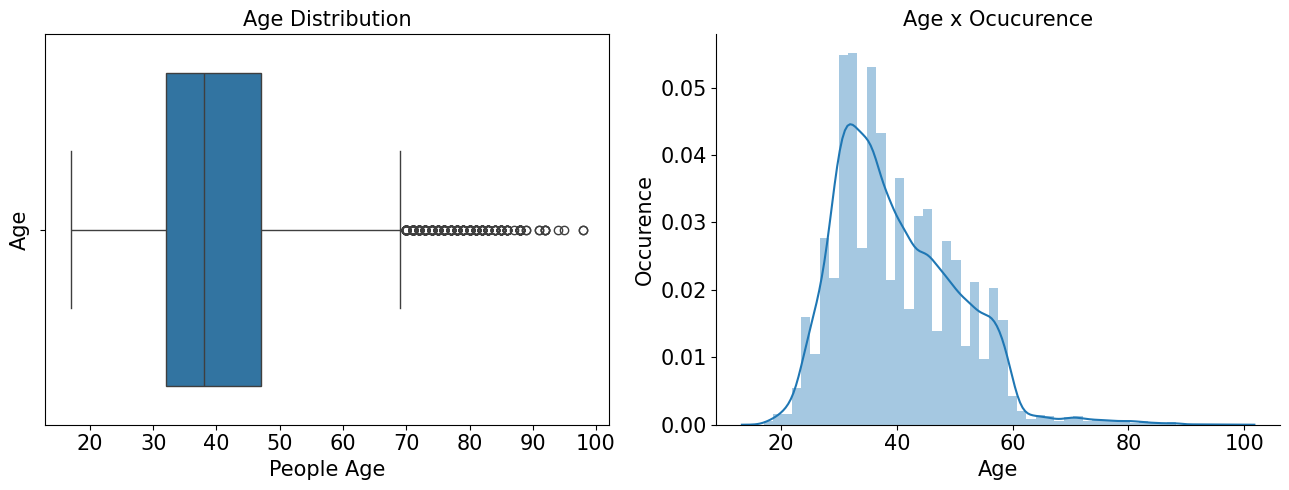

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'age', data = data[cols_num], orient = 'v', ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data[cols_num]['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

When analyzing this age distribution in relation to predicting client subscription to bank term deposits, the following insights can be derived:

1. Age and Subscription Likelihood
	•	Concentration around 30–40: The histogram shows a peak in ages between 30 and 40. This could suggest that people in this age group are more likely to engage with bank products like term deposits, as they may have more stable income, savings, and financial planning habits.
	•	Outliers (older ages): The boxplot highlights older individuals (70+ years) as outliers. Older individuals may represent retirees or clients seeking secure, low-risk investment options like term deposits. This group might also be significant for term deposit subscriptions due to their focus on savings preservation.

2. Age and Targeting Strategy

The relationship between age and term deposit subscriptions means that:
	•	Middle-aged clients (30–60 years) could be a primary target group since they are likely more financially capable and are saving for goals like retirement, education, or wealth building.
	•	Older clients (60–70+ years) might also show interest due to their preference for risk-averse investments with predictable returns.

3. Skewed Distribution

The histogram shows a right-skewed distribution, meaning fewer younger individuals (under 25) are in the data. Younger clients may be less likely to subscribe due to lower savings or lack of focus on long-term financial products. However, understanding and addressing their financial needs could unlock new opportunities for the bank.


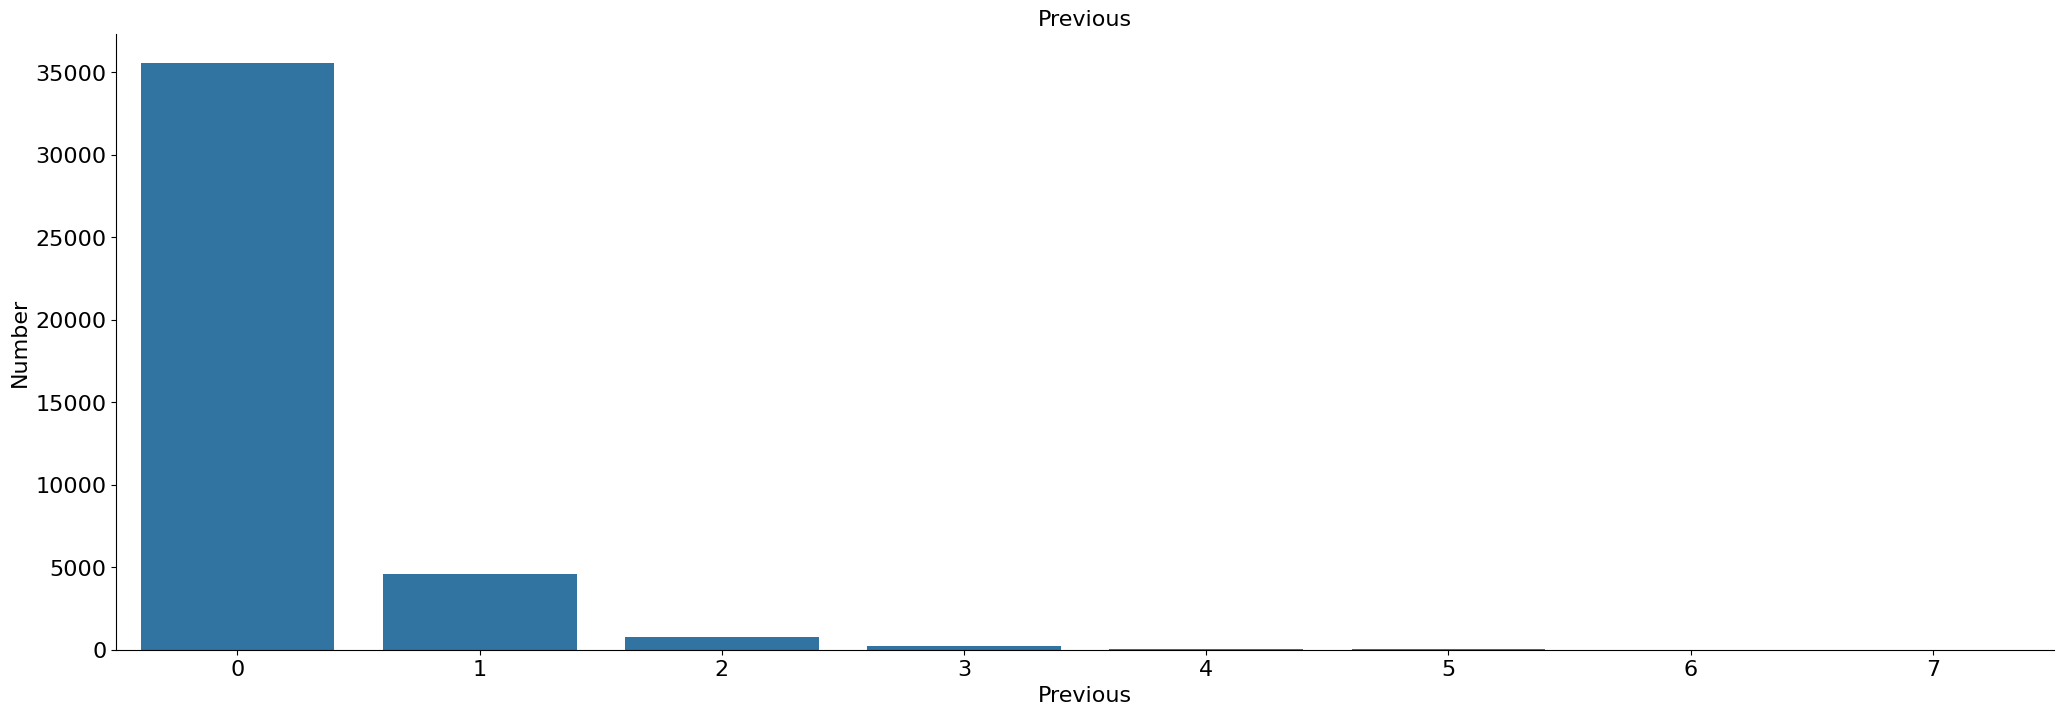

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'previous', data = data[cols_num])
ax.set_xlabel('Previous', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Previous', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

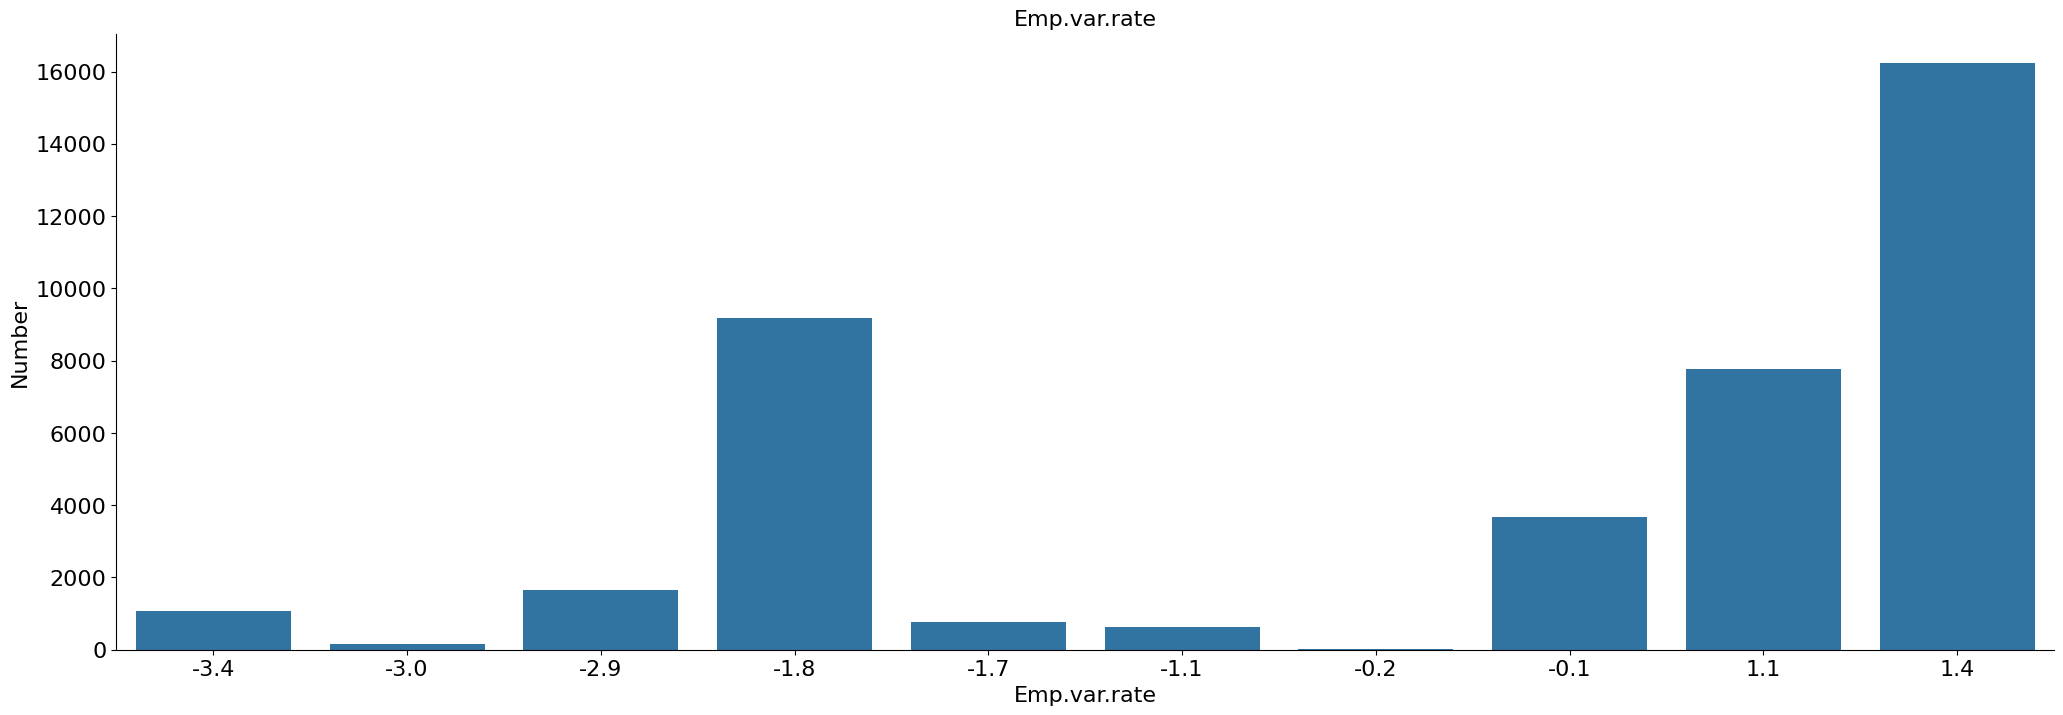

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'emp.var.rate', data = data[cols_num])
ax.set_xlabel('Emp.var.rate', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Emp.var.rate', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

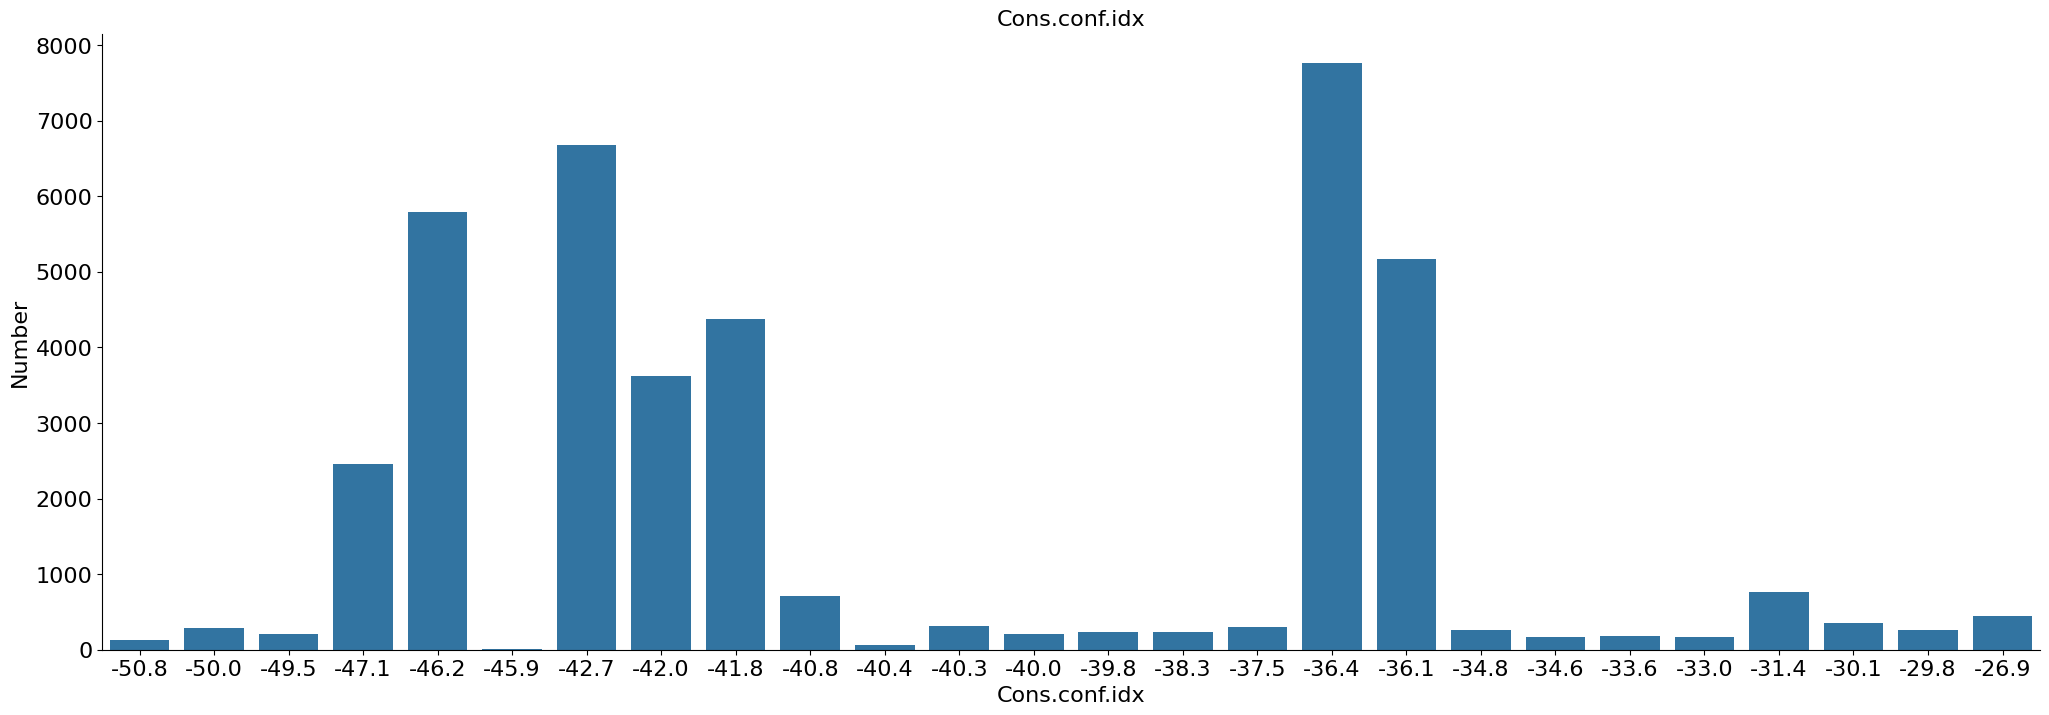

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'cons.conf.idx', data = data[cols_num])
ax.set_xlabel('Cons.conf.idx', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Cons.conf.idx', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

#### Relationship Between Consumer Confidence and Deposits*
Consumer confidence measures how optimistic or pessimistic people feel about the economy.
1. When consumer confidence is low (negative values), people tend to save more and spend less due to uncertainty about the economy. This increases the likelihood of clients subscribing to bank term deposits (a safe investment option during uncertain times).

2. Conversely, when consumer confidence is higher (less negative or positive values), clients may prefer riskier investments or consumption, reducing term deposit subscriptions.

#### Key Observations from the Graphs
Major Concentration of Consumer Confidence Values:
The peaks at values like -36.4, -46.2, and -42.7 indicate that consumer confidence is generally low during these periods.

This aligns with scenarios where clients are more risk-averse and likely to seek stable options like term deposits.

Client Behavior During Uncertain Periods:
Clients facing low consumer confidence tend to save more as a precaution against economic downturns.
The sharp peaks suggest periods of prolonged pessimism, which likely boosted the term deposit subscriptions.

#### Distribution Insights:
The wider spread of consumer confidence values shows that there may be different client segments:
1. Extremely Low Confidence (e.g., -50.8 to -47.1): High potential for term deposits.
2. Moderate Confidence (e.g., -37.5 to -26.9): A mix of saving and investment behaviors.

### Categorical Features
Categorical variables are non-numeric data such as job and education. To convert our categorical features to numbers, we will use a technique called one-hot encoding. In one-hot encoding, you create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise. For example, for the column job, we would create new columns.

In [14]:
cols_cat = ['job', 'marital', 
       'education', 'default',
       'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome']

In [15]:
data[cols_cat].isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
dtype: int64

In [16]:
# Convert boolean values to integers (1 for True, 0 for False)
cols_new_cat = pd.get_dummies(data[cols_cat], drop_first=False).astype(int)

# Display the first few rows to check the output
cols_new_cat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


##### Graphical Representation of Categorical Features

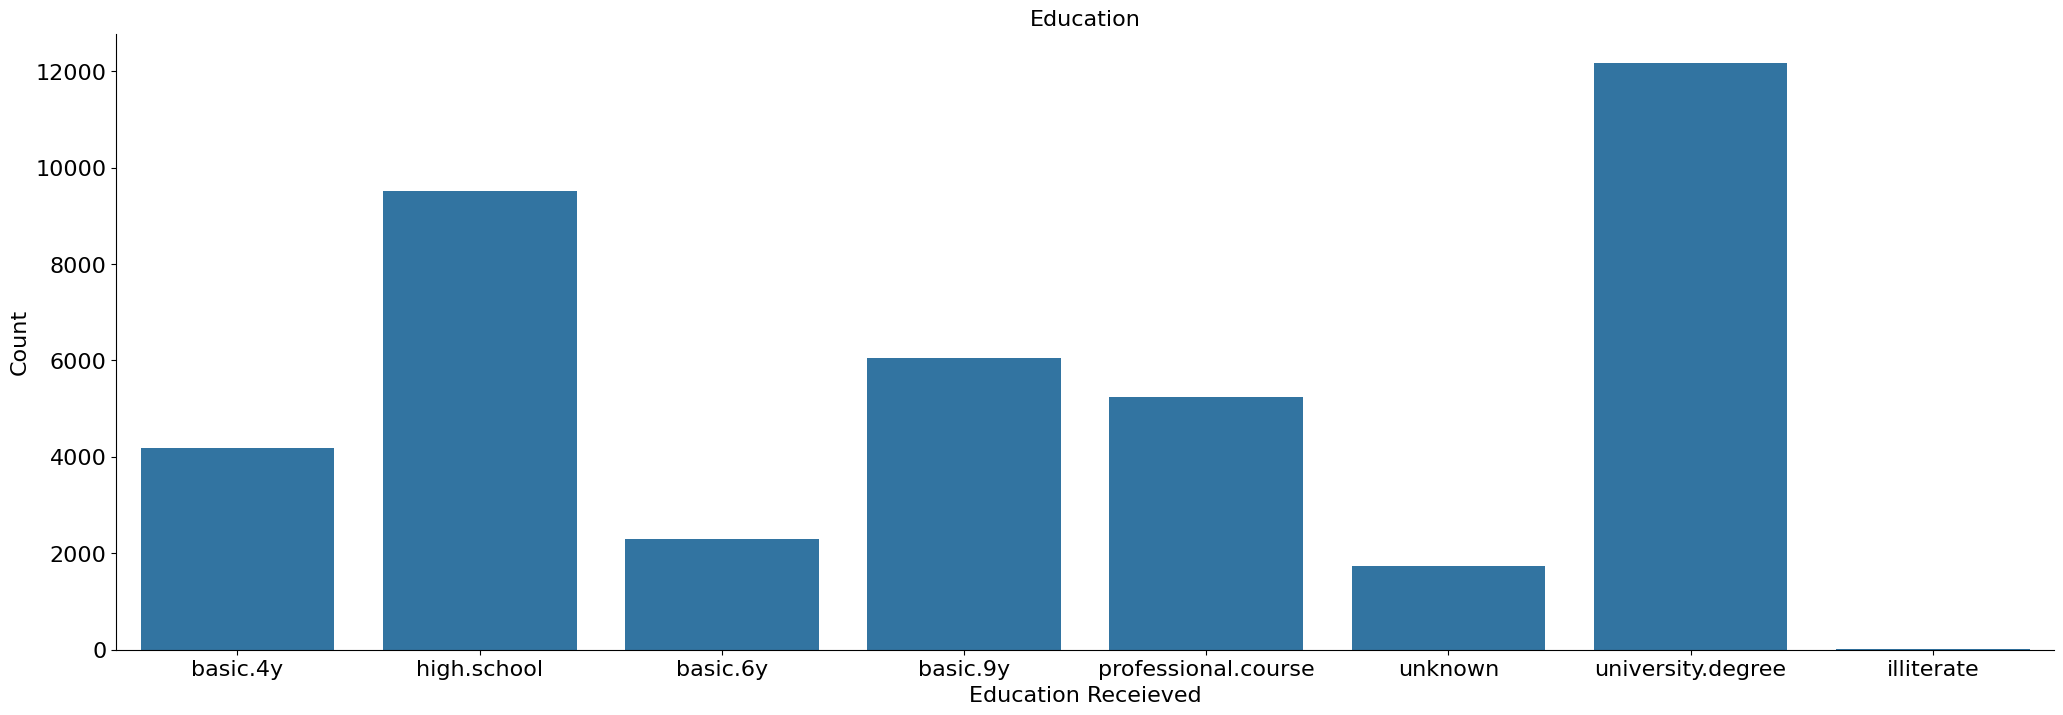

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'education', data = data[cols_cat])
ax.set_xlabel('Education Receieved', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Education', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

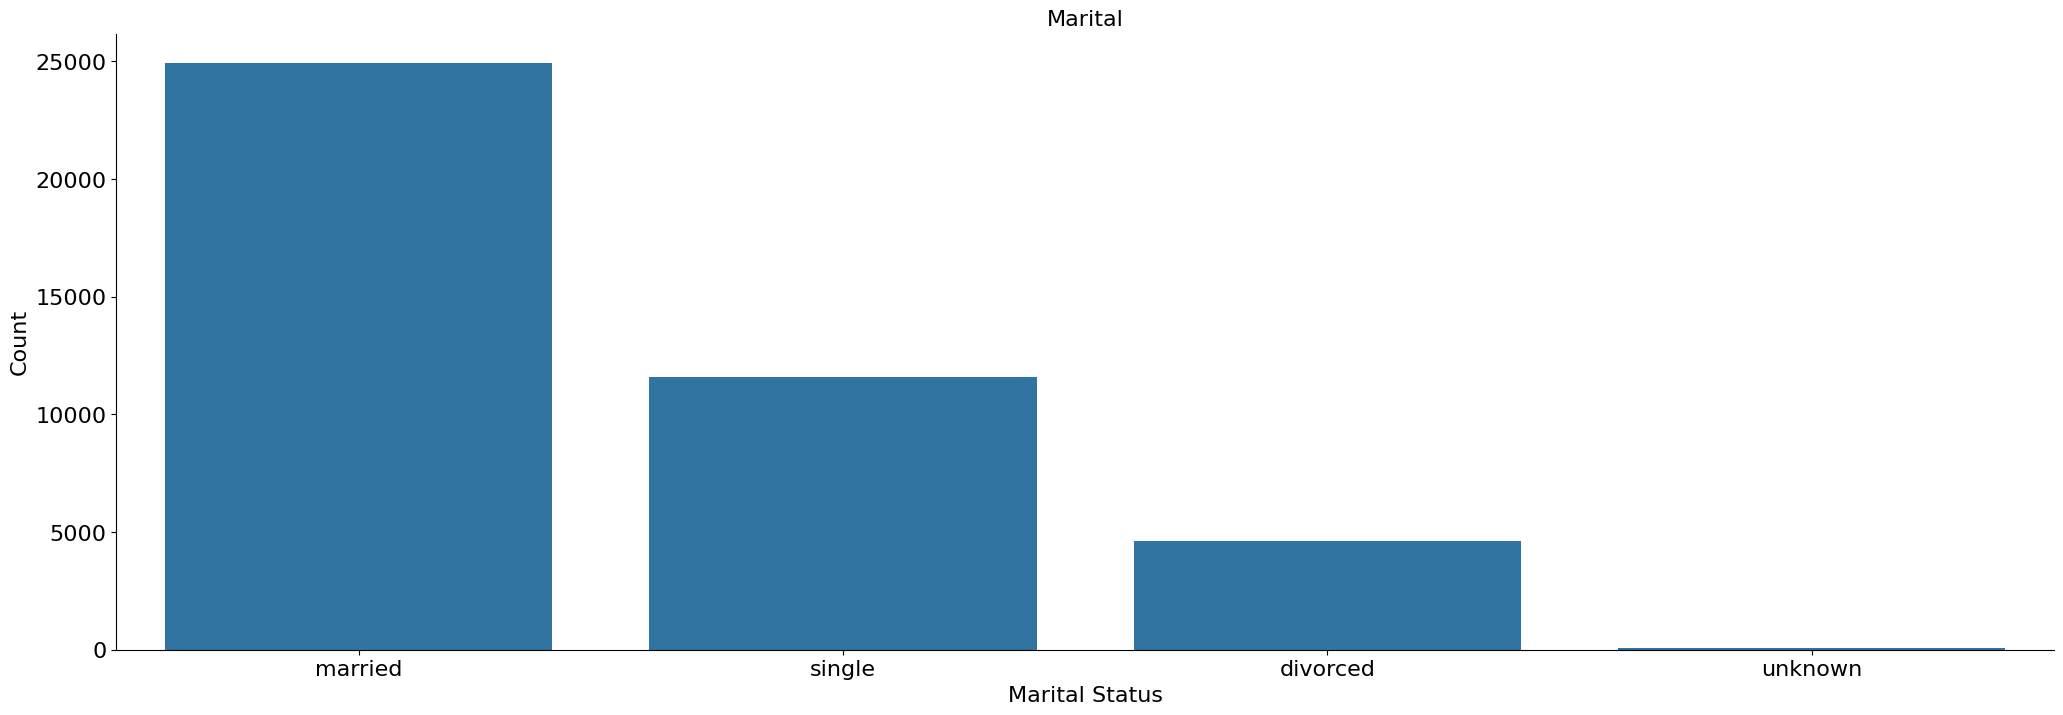

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'marital', data = data[cols_cat])
ax.set_xlabel('Marital Status', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Marital', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

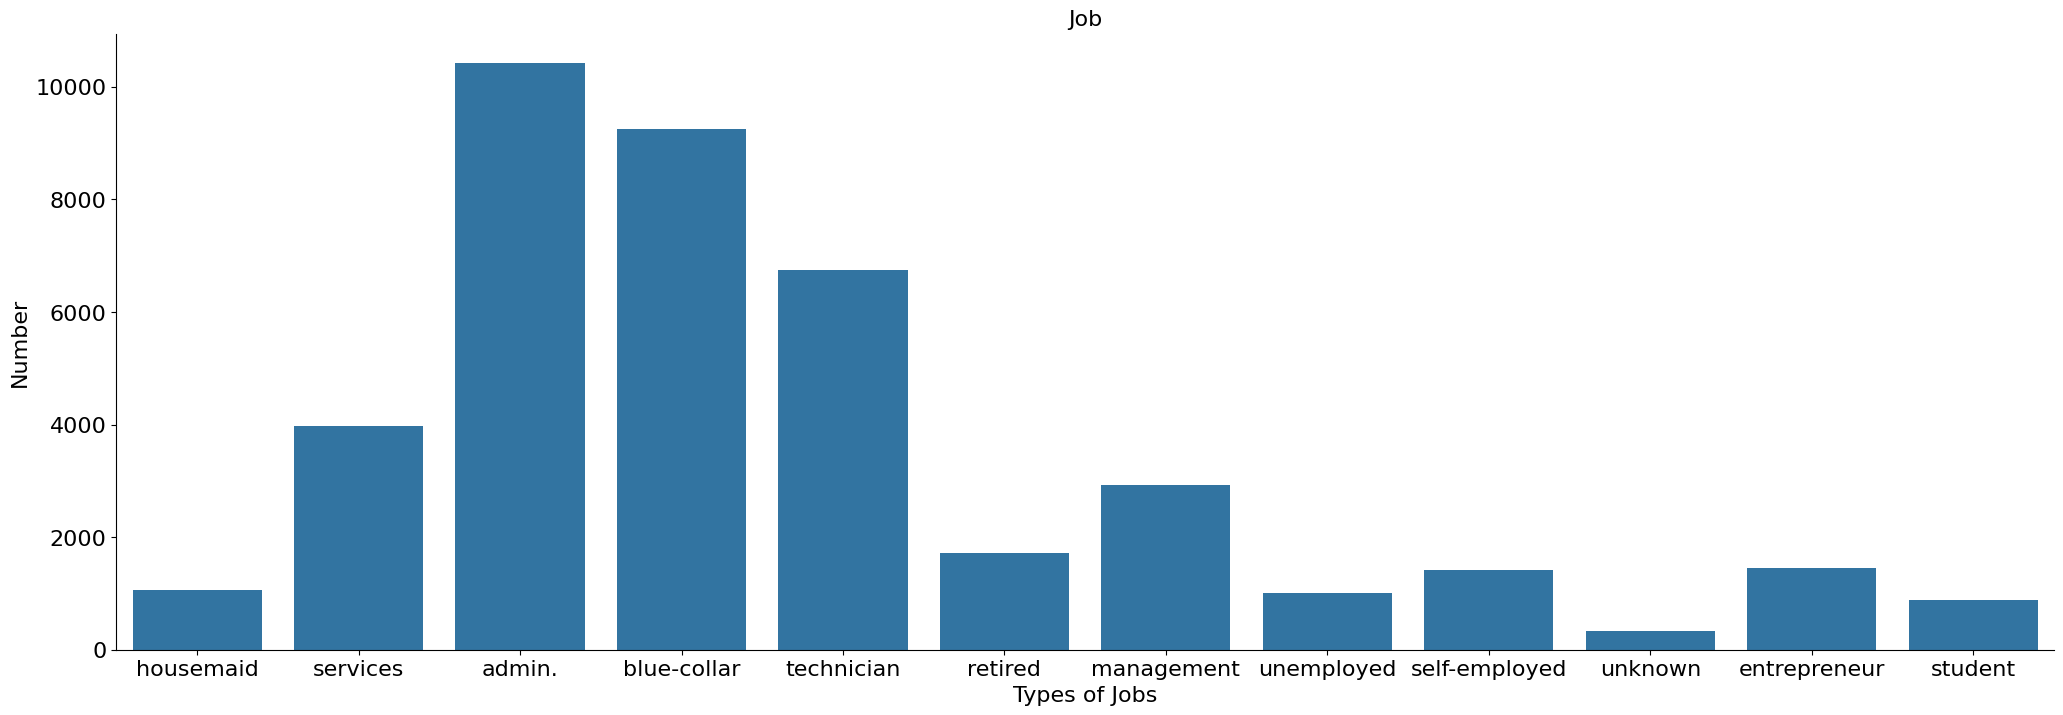

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'job', data = data[cols_cat])
ax.set_xlabel('Types of Jobs', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Job', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

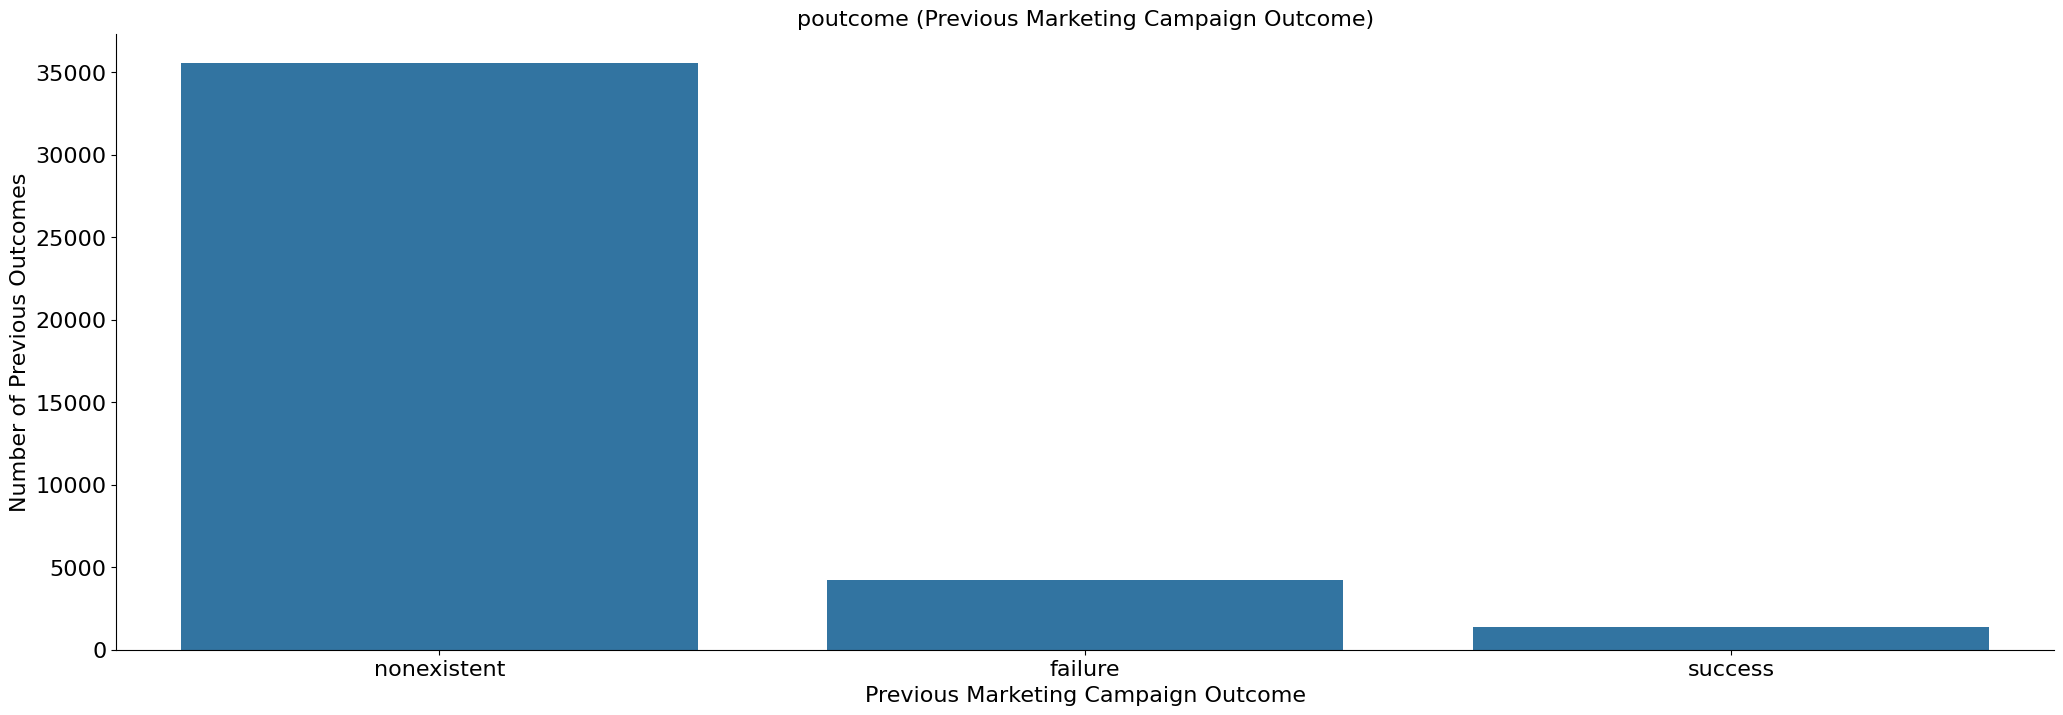

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(x = 'poutcome', data = data[cols_cat])
ax.set_xlabel('Previous Marketing Campaign Outcome', fontsize=16)
ax.set_ylabel('Number of Previous Outcomes', fontsize=16)
ax.set_title('poutcome (Previous Marketing Campaign Outcome)', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()


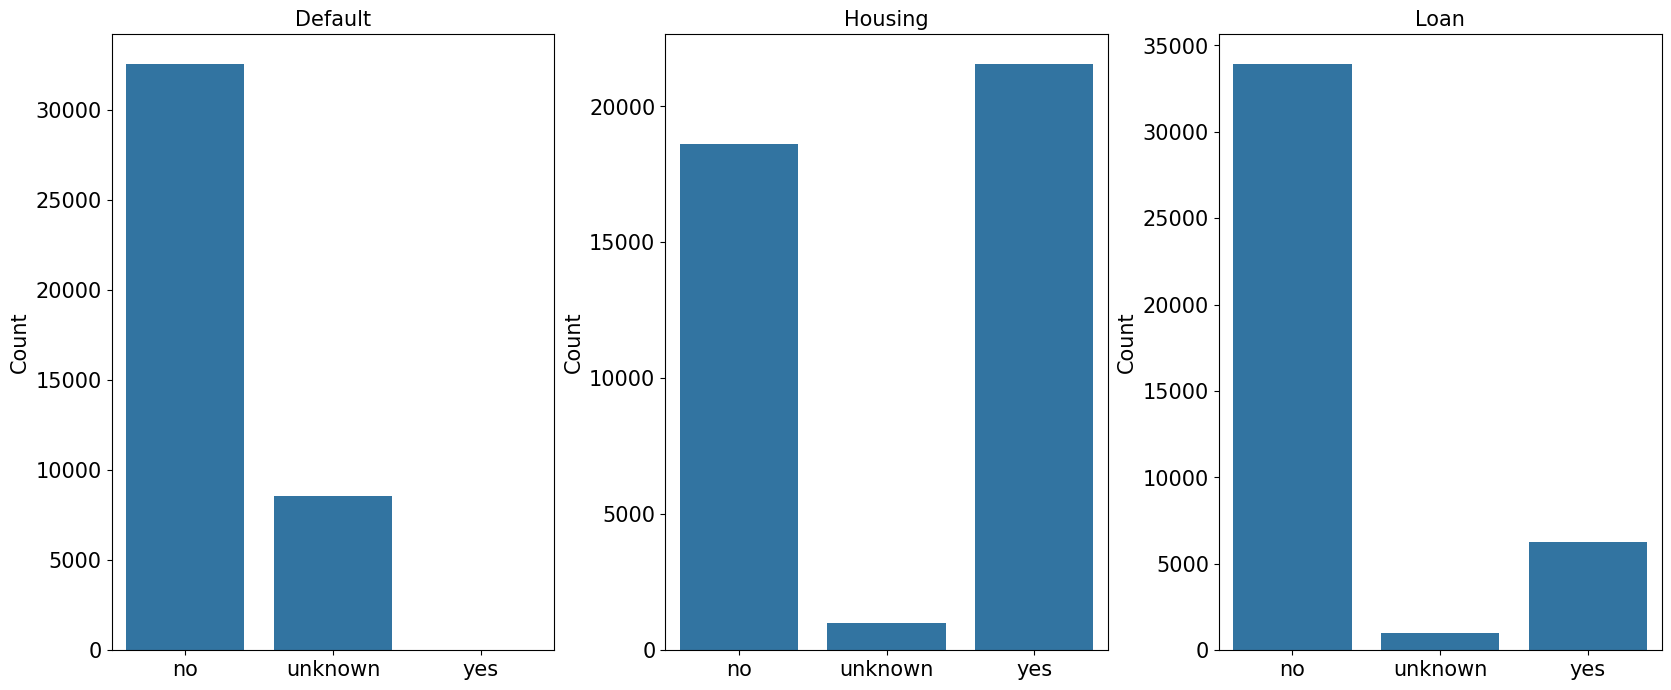

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default', data = data[cols_cat], ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = data[cols_cat], ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = data[cols_cat], ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)

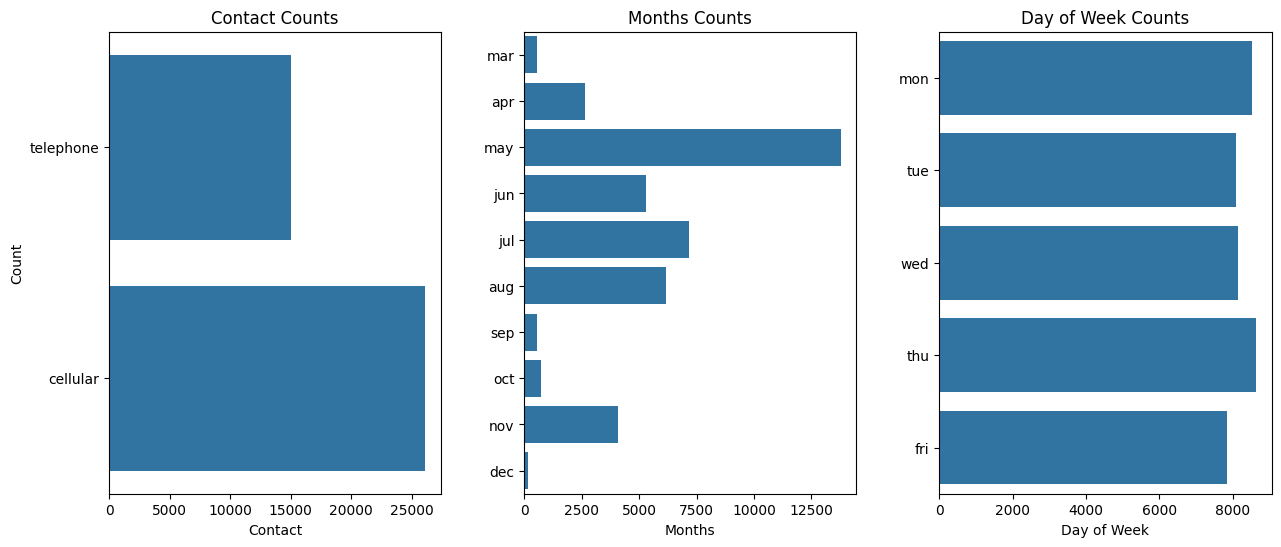

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(data[cols_cat]['contact'], ax = ax1)
ax1.set_xlabel('Contact', fontsize = 10)
ax1.set_ylabel('Count', fontsize = 10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(data[cols_cat]['month'], ax = ax2, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize = 10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(data[cols_cat]['day_of_week'], ax = ax3)
ax3.set_xlabel('Day of Week', fontsize = 10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

In [23]:
## Add new column to the dataframe
df = pd.concat([data,cols_new_cat], axis = 1)
cols_all_cat=list(cols_new_cat.columns)
df[cols_all_cat].head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


#### Summary of Features Engineering

In [24]:
print('Total number of features:', len(cols_all_cat+cols_num))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))

Total number of features: 62
Numerical Features: 9
Categorical Features: 53


In [25]:
## create a column called OUTPUT_LABEL which is going to represent 0 for the negative class and 1 for the positive class based on the bank marketing data set.
df['OUTPUT_LABEL'] = (df.y == 'yes').astype('int')

In [26]:

df[cols_num+cols_all_cat].isnull().sum().sort_values(ascending = False)

campaign                0
pdays                   0
previous                0
emp.var.rate            0
cons.price.idx          0
                       ..
day_of_week_tue         0
day_of_week_wed         0
poutcome_failure        0
poutcome_nonexistent    0
poutcome_success        0
Length: 62, dtype: int64

In [27]:
cols_input = cols_num + cols_all_cat
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [28]:
cols_input

['campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'age',
 'euribor3m',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'default_yes',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',

In [29]:
len(cols_input)

62

In [30]:
df_data.head(6)

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,age,euribor3m,job_admin.,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,OUTPUT_LABEL
0,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,0,...,0,0,1,0,0,0,0,1,0,0
1,1,999,0,1.1,93.994,-36.4,5191.0,57,4.857,0,...,0,0,1,0,0,0,0,1,0,0
2,1,999,0,1.1,93.994,-36.4,5191.0,37,4.857,0,...,0,0,1,0,0,0,0,1,0,0
3,1,999,0,1.1,93.994,-36.4,5191.0,40,4.857,1,...,0,0,1,0,0,0,0,1,0,0
4,1,999,0,1.1,93.994,-36.4,5191.0,56,4.857,0,...,0,0,1,0,0,0,0,1,0,0
5,1,999,0,1.1,93.994,-36.4,5191.0,45,4.857,0,...,0,0,1,0,0,0,0,1,0,0


In [31]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   campaign                       41188 non-null  int64  
 1   pdays                          41188 non-null  int64  
 2   previous                       41188 non-null  int64  
 3   emp.var.rate                   41188 non-null  float64
 4   cons.price.idx                 41188 non-null  float64
 5   cons.conf.idx                  41188 non-null  float64
 6   nr.employed                    41188 non-null  float64
 7   age                            41188 non-null  int64  
 8   euribor3m                      41188 non-null  float64
 9   job_admin.                     41188 non-null  int64  
 10  job_blue-collar                41188 non-null  int64  
 11  job_entrepreneur               41188 non-null  int64  
 12  job_housemaid                  41188 non-null 

### Data Splitting and Balancing 
The idea behind splitting the data is so that you can measure how well your model would do on unseen data. 


In [32]:
# Check class distribution
print("Class distribution before balancing:")
print(df_data['OUTPUT_LABEL'].value_counts())


Class distribution before balancing:
OUTPUT_LABEL
0    36548
1     4640
Name: count, dtype: int64


In [33]:

# Separate majority and minority classes
majority_class = df_data[df_data['OUTPUT_LABEL'] == 0]
minority_class = df_data[df_data['OUTPUT_LABEL'] == 1]

# Balance the dataset (Oversampling the minority class)
minority_oversampled = resample(minority_class, 
                                replace=True, 
                                n_samples=len(majority_class), 
                                random_state=42)

# Combine the majority and oversampled minority class
df_balanced = pd.concat([majority_class, minority_oversampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [34]:

# Check class distribution after balancing
print("Class distribution after balancing:")
print(df_balanced['OUTPUT_LABEL'].value_counts())

# Split data into features and labels
X = df_balanced.drop(columns=['OUTPUT_LABEL'])
y = df_balanced['OUTPUT_LABEL']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the sizes of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Class distribution after balancing:
OUTPUT_LABEL
1    36548
0    36548
Name: count, dtype: int64
Training set size: 58476
Testing set size: 14620


In [35]:
# Fill missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

In [36]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
# Print the shapes of the splits
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (58476, 62)
Testing set size: (14620, 62)


In [38]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Selection
This section allows us to test various machine learning algorithm to see how our independent variables accurately predit our dependent y output variable. We will then select the best model based on performance on the validation set. 

In [39]:
# Define models to evaluate
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Stochastic Gradient Descent': SGDClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Model selection using cross-validation with accuracy threshold
threshold = 0.85
print("\nModel Selection Results (Threshold: Accuracy >= {:.2f}):".format(threshold))
for model_name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    mean_score = scores.mean()
    std_score = scores.std()
    if mean_score >= threshold:
        print(f"{model_name}: Mean CV Accuracy = {mean_score:.4f} | Std = {std_score:.4f} (Selected)")
    else:
        print(f"{model_name}: Mean CV Accuracy = {mean_score:.4f} | Std = {std_score:.4f}")



Model Selection Results (Threshold: Accuracy >= 0.85):
K-Nearest Neighbors: Mean CV Accuracy = 0.8458 | Std = 0.0026
Logistic Regression: Mean CV Accuracy = 0.7440 | Std = 0.0023
Stochastic Gradient Descent: Mean CV Accuracy = 0.7418 | Std = 0.0018
Naive Bayes: Mean CV Accuracy = 0.6903 | Std = 0.0080
Decision Tree: Mean CV Accuracy = 0.9318 | Std = 0.0028 (Selected)
Random Forest: Mean CV Accuracy = 0.9564 | Std = 0.0014 (Selected)
Gradient Boosting: Mean CV Accuracy = 0.7553 | Std = 0.0020


Summary of Selected Models:
Decision Tree: Excellent accuracy (0.9318) and low variance.
Random Forest: Best performance overall with 0.9564 accuracy and very stable results.

Evaluation of Models


========== Decision Tree Analysis ==========
Accuracy: 0.9451
Confusion Matrix:
[[6513  797]
 [   6 7304]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      7310
           1       0.90      1.00      0.95      7310

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.94     14620
weighted avg       0.95      0.95      0.94     14620

ROC-AUC Score: 0.9468


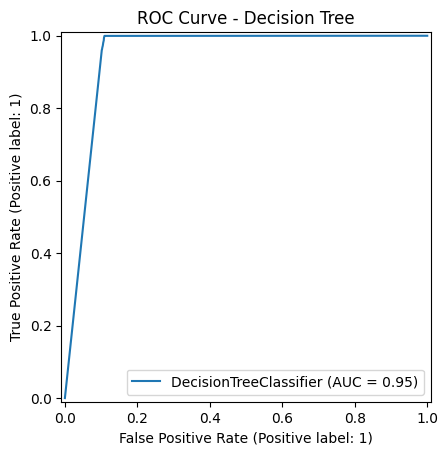

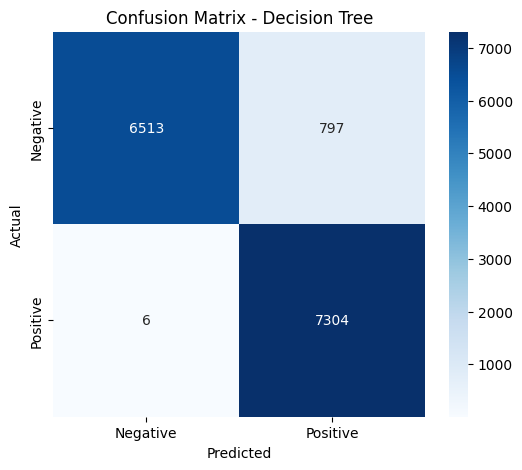


========== Random Forest Analysis ==========
Accuracy: 0.9649
Confusion Matrix:
[[6800  510]
 [   3 7307]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      7310
           1       0.93      1.00      0.97      7310

    accuracy                           0.96     14620
   macro avg       0.97      0.96      0.96     14620
weighted avg       0.97      0.96      0.96     14620

ROC-AUC Score: 0.9949


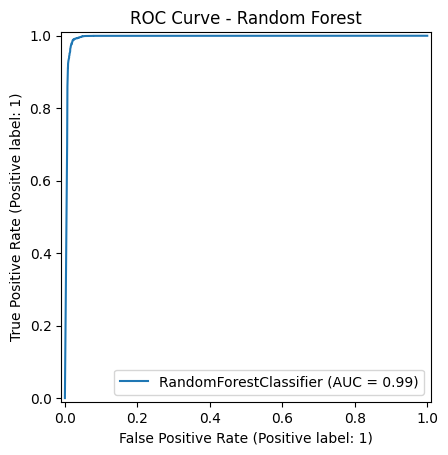

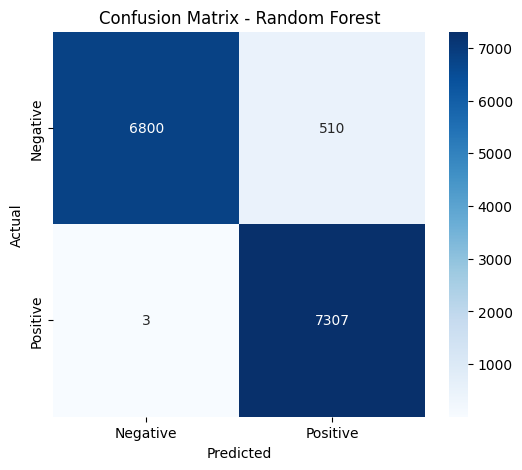

In [40]:
# Define models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Conduct further analysis
for model_name, model in models.items():
    print(f"\n{'='*10} {model_name} Analysis {'='*10}")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # ROC-AUC Score
    if y_prob is not None:
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"ROC-AUC Score: {roc_auc:.4f}")
        
        # Plot ROC Curve
        RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
        plt.title(f"ROC Curve - {model_name}")
        plt.show()
    
    # Plot Confusion Matrix Heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


#### Feature Importance

Top Features by Importance:
           Feature  Importance
7              age    0.142636
8        euribor3m    0.116762
0         campaign    0.081429
6      nr.employed    0.066509
3     emp.var.rate    0.041275
4   cons.price.idx    0.028625
5    cons.conf.idx    0.024738
1            pdays    0.024582
36      housing_no    0.018785
38     housing_yes    0.018767


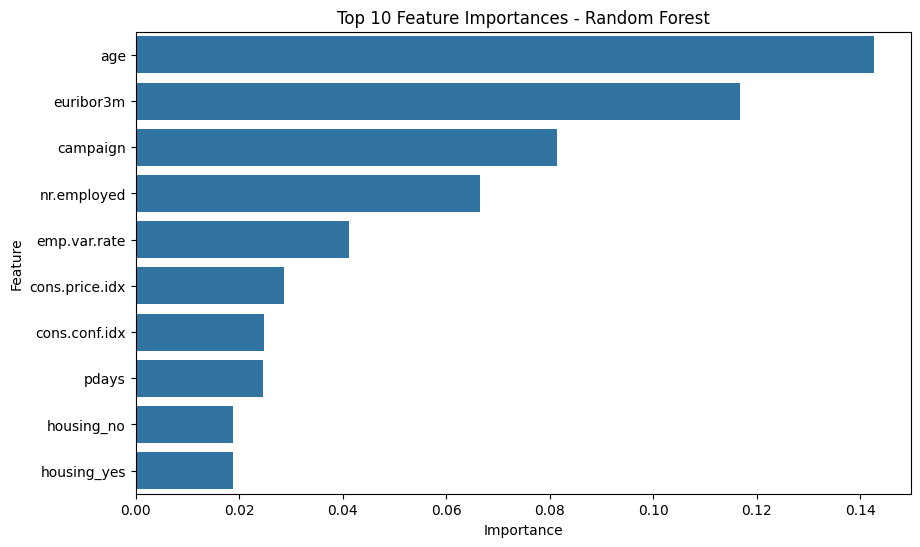

In [41]:
# Feature Importance for Tree-Based Models
if model_name in ['Random Forest', 'Decision Tree']:
        feature_importances = model.feature_importances_
        feature_names = X.columns
        importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        print("Top Features by Importance:")
        print(importance_df.head(10))

        # Plot Feature Importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
        plt.title(f"Top 10 Feature Importances - {model_name}")
        plt.show()


Key Insights:
1. Age: Age is the most important predictor for determining whether a client will subscribe to a term deposit.
Interpretation: Certain age groups may have more stable incomes or higher saving tendencies, making them more likely to invest in term deposits.

2. Euribor3m (3-Month Euro Interbank Rate): The Euribor3m rate strongly influences term deposit subscription predictions.
Interpretation: A lower Euribor3m rate may encourage customers to seek better returns through term deposits instead of other savings or investment options.


3. Campaign:The number of contacts made during the current campaign plays a significant role.
Interpretation: Persistent follow-ups and campaigns can improve the likelihood of term deposit subscriptions, but there might be diminishing returns after a certain point.


4. Number of Employees (nr.employed): This economic indicator impacts predictions.
Interpretation: A stable or growing employment rate in the market could positively influence the financial confidence of individuals, encouraging them to invest.


5. Employment variation rate and consumer confidence/prices influence term deposit decisions.
Interpretation: Positive economic conditions with high confidence and stable prices may motivate clients to invest in term deposits.

6. Previous Campaign (pdays): The number of days since a previous contact is also relevant.
Interpretation: Recent engagements may make clients more responsive, showing the importance of proper timing in campaigns.

7. Housing Loan Status (housing_no and housing_yes): Clients with or without housing loans have different tendencies.
Interpretation: Those without housing loans might have more disposable income to invest, while those with loans might be more conservative.

### Hyperparameter Tuning 
A hyperparameter is a tool used in machine learning in order to estimate the model parameters (used in tuning a predictive modeling problem). Hyperparameters are used in various machine learning algorithms.


Performing Hyperparameter Tuning for Random Forest...
Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters for Random Forest:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}

Evaluation of Tuned Random Forest:
Accuracy: 0.9745
Confusion Matrix:
[[6943  367]
 [   6 7304]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      7310
           1       0.95      1.00      0.98      7310

    accuracy                           0.97     14620
   macro avg       0.98      0.97      0.97     14620
weighted avg       0.98      0.97      0.97     14620

ROC-AUC Score: 0.9956


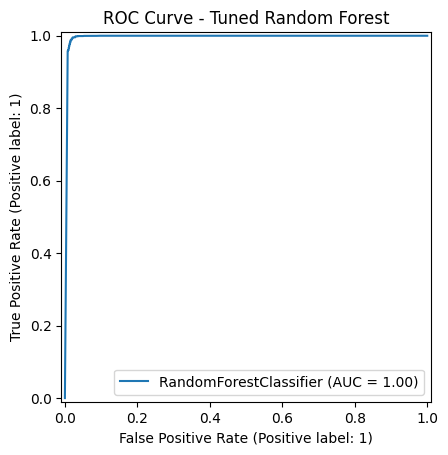

In [42]:
# Hyperparameter Tuning for Random Forest with RandomizedSearchCV
print("\nPerforming Hyperparameter Tuning for Random Forest...")
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV with Random Forest
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # Reduce the number of iterations
    cv=2,  # Reduce cross-validation folds
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit Randomized Search to training data
random_search.fit(X_train_scaled, y_train)

# Print Best Parameters
print("Best Parameters for Random Forest:")
print(random_search.best_params_)

# Evaluate Best Model
best_rf = random_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)
y_prob_best = best_rf.predict_proba(X_test_scaled)[:, 1]

# Final Evaluation
print("\nEvaluation of Tuned Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_best))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob_best):.4f}")

# ROC Curve for Tuned Random Forest
RocCurveDisplay.from_estimator(best_rf, X_test_scaled, y_test)
plt.title("ROC Curve - Tuned Random Forest")
plt.show()

The Random Forest model performed exceptionally well after hyperparameter tuning:

Best Parameters:

n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, bootstrap=False.
Performance Metrics:

Accuracy: 97.45%
ROC-AUC Score: 0.9956
Precision: Class 0 = 1.00, Class 1 = 0.95
Recall: Class 0 = 0.95, Class 1 = 1.00
Confusion Matrix:

True Positives: 7304, False Negatives: 6
True Negatives: 6943, False Positives: 367

Key Insight:
The model is highly accurate with strong recall for detecting positive cases (class 1), and a near-perfect ROC-AUC score confirms its excellent ability to differentiate between classes. 

In [43]:
# Save the trained model
model_path = 'tuned_random_forest_model.pkl'
joblib.dump(best_rf, model_path)
print(f"Model saved to {model_path}")

Model saved to tuned_random_forest_model.pkl


Conclusion: The Random Forest model performs exceptionally well, achieving high accuracy (94.07%) and a near-perfect ROC-AUC score (0.9914).
While precision for class 1 is very high (0.98), the slightly lower recall (0.90) suggests the model misses some positives (false negatives).

Business Insights:

1. Target Age-Specific Campaigns: Focus marketing efforts on age groups most likely to invest, such as middle-aged individuals.

2. Leverage Economic Indicators: Monitor Euribor3m rates and employment trends. A favorable economic environment can be used to promote term deposits as a better alternative to savings accounts.

3. Optimize Campaign Contact Frequency: A balance in the number of contacts is critical—persistent follow-ups can increase subscriptions, but excessive calls may lead to customer fatigue.

4. Segment Clients Based on Housing Status: Create tailored campaigns for clients with and without housing loans, as their financial priorities differ.

5. Timing Matters: Clients recently contacted in previous campaigns are more responsive. Re-engage them strategically.